# Лабораторная работа 4 — Кластеризация (Вариант 5)

Набор данных: `telecom_churn.csv` (вариант 5).

**Цель:** изучение алгоритмов и методов кластеризации на практике.

## Часть 1

**1.1-1.2 Использование функции для создания набора данных и ее применение**

Был создан синтетический набор данных из 150 записей с двумя признаками (x, y). Использование фиксированных параметров (n=50, seed=36) гарантирует воспроизводимость эксперимента и имитирует данные, которые, как известно, содержат три четко разделенных кластера.


In [1]:
import numpy as np
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
def make_data(n, seed):
    np.random.seed(seed)
    shift_matrix = np.array([[3, 3], [6, 9], [9, 3]])

    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])

    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
    columns=['x', 'y'])
    df = df.sample(frac=1.0)
    return df

n = 50
seed = 42
df = make_data(n, seed)
display(df)

,x,y
33,38.845781,1.240865
23,31.505036,2.282322
50,91.692585,4.625246
63,169.264842,4.089659
88,136.270344,4.076603
...,...,...
95,135.636457,4.692659
35,35.583127,1.249121
98,130.438831,4.529104
100,187.155747,0.869558


**1.3-1.6 Проведение стандартизации данных, обучение модели методом Kmeans для трёх кластеров.
Выполнение предсказания. Получение меток кластеров. Подсчет коэффициента силуэта, проведение визуализации**

Была проведена стандартизация через StandrdScaler, которая стандартизирует все данные, т. е. делает так, чтобы их мат ожидание было равно 0, а стандартное отклонение равно 1.

 Для этого из исходного значения признака вычитается среднее, и эта разность делится на стандартное отклонение. Таким образом, данные имеют вид стандартного
нормального распределения, что позволяет минимизировать среднеквадратичную ошибку.

Это нужно чтобы все признаки (колонки) в наборе данных вносили одинаковый вклад в процесс обучения модели, независимо от их исходного масштаба

Далее проводится обучение модели K-Means при k=3, расчёт коэффициента силуэта и визуализация полученных групп. Эти шаги позволяют оценить качество кластеризации как количественно (через метрики), так и визуально (через графики распределения).

Коэффициент силуэта (k=3): 0.7242054688229007


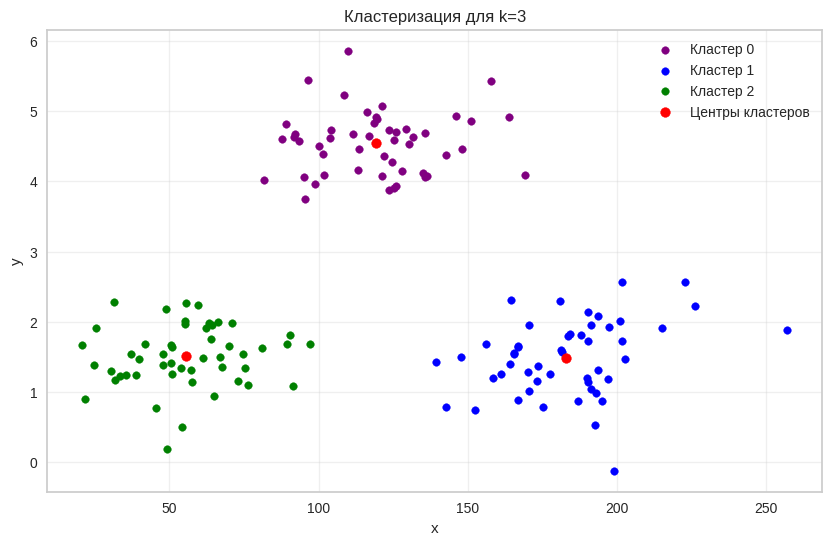

In [2]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df[['x','y']])

km3 = KMeans(n_clusters=3, random_state=seed)
labels3 = km3.fit_predict(X_scaled)

sil3 = silhouette_score(X_scaled, labels3)

centers3 = scaler.inverse_transform(km3.cluster_centers_)
print('Коэффициент силуэта (k=3):', sil3)

plt.figure(figsize=(10,6))
colors = ['purple', 'blue', 'green']
for i, label in enumerate(np.unique(labels3)):
    mask = labels3 == label
    plt.scatter(df['x'].values[mask], df['y'].values[mask], s=30, color=colors[i], label=f'Кластер {label}')

plt.scatter(centers3[:,0], centers3[:,1], label='Центры кластеров', color='red')

plt.title(f'Кластеризация для k=3')
plt.xlabel('x'); 
plt.ylabel('y'); 
plt.legend(); 
plt.grid(alpha=0.3)
plt.show()


**1.7 Повторение пунктов 1.4-1.6 для n_clusters = 2 и n_clusters = 4**

Пункты 1.4-1.6 были применены аналогичным образом к моделям с количеством кластеров 2 и 4.

Коэффициент силуэта (k=2): 0.49890989516429823


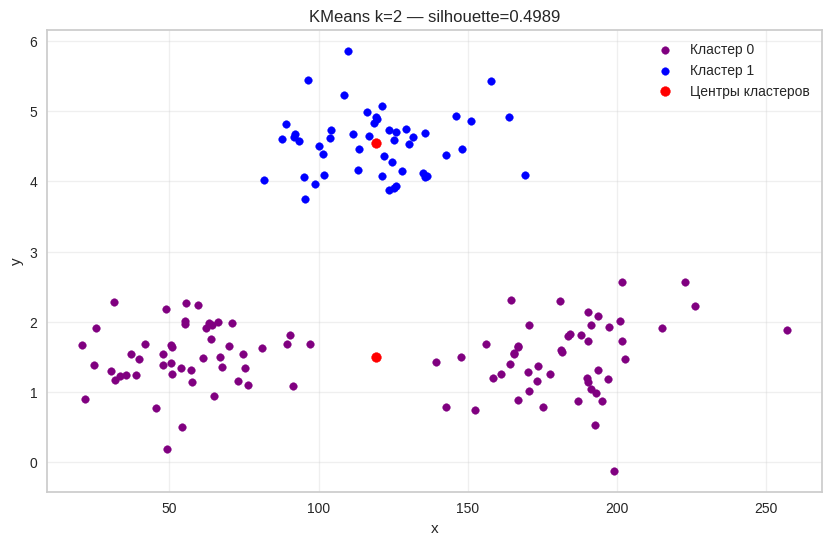

Коэффициент силуэта (k=4): 0.6104795001622662


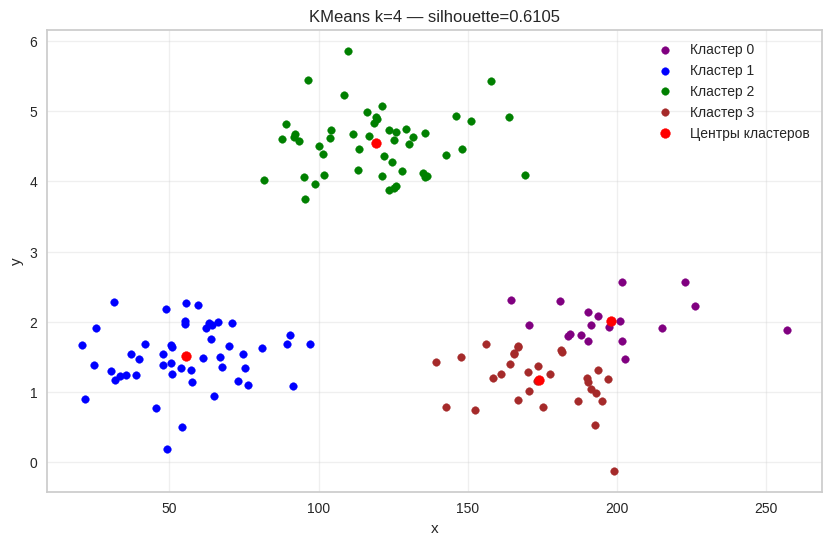

In [3]:
colors = ['purple', 'blue', 'green', 'brown']
# k=2
km2 = KMeans(n_clusters=2, random_state=seed, n_init=10)
labels2 = km2.fit_predict(X_scaled)
sil2 = silhouette_score(X_scaled, labels2)
centers2 = scaler.inverse_transform(km2.cluster_centers_)
print('Коэффициент силуэта (k=2):', sil2)
plt.figure(figsize=(10,6))
for i, label in enumerate(np.unique(labels2)):
    mask = labels2 == label
    plt.scatter(df['x'].values[mask], df['y'].values[mask], s=30, color=colors[i], label=f'Кластер {label}')
plt.scatter(centers2[:,0], centers2[:,1], color='red', label='Центры кластеров')
plt.title(f'KMeans k=2 — silhouette={sil2:.4f}')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(alpha=0.3)
plt.show()

# k=4
km4 = KMeans(n_clusters=4, random_state=seed, n_init=10)
labels4 = km4.fit_predict(X_scaled)
sil4 = silhouette_score(X_scaled, labels4)
centers4 = scaler.inverse_transform(km4.cluster_centers_)
print('Коэффициент силуэта (k=4):', sil4)
plt.figure(figsize=(10,6))
for i, label in enumerate(np.unique(labels4)):
    mask = labels4 == label
    plt.scatter(df['x'].values[mask], df['y'].values[mask], color=colors[i], s=30, label=f'Кластер {label}')
plt.scatter(centers4[:,0], centers4[:,1], color='red', label='Центры кластеров')
plt.title(f'KMeans k=4 — silhouette={sil4:.4f}')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(alpha=0.3)
plt.show()

**Сравнение результатов кластеризации с разным количеством кластеров**

Анализ результатов кластеризации методом K-means для различных значений k показал, что качество разбиения данных существенно зависит от выбранного числа кластеров.

При k=2 алгоритм объединил объекты из трёх исходных групп в две кластерные структуры. На графике видно, что один из полученных кластеров (например, фиолетовый) охватывает точки, принадлежащие двум разным генеративным группам — нижней левой и правой. Это приводит к снижению внутренней компактности кластеров и увеличению расстояния между центрами кластеров и их точками. Соответственно, коэффициент силуэта достигает лишь значения 0.50, что указывает на слабую кластерную структуру: объекты внутри кластеров не слишком похожи друг на друга, а границы между кластерами размыты.

При k=4 наблюдается обратная ситуация — происходит перекластеризация. Алгоритм пытается разделить данные на четыре группы, хотя в исходных данных заложено только три. На графике видно, что один из исходных кластеров (например, верхний) был искусственно разбит на два: синий и коричневый. Эти два кластера расположены очень близко друг к другу, что свидетельствует об их низкой дифференцированности. В результате средний силуэтный коэффициент составляет 0.61, что выше, чем при k=2, но всё ещё значительно ниже оптимального значения.

Наиболее качественный результат достигнут при k=3. В этом случае алгоритм K-means успешно восстановил исходную структуру данных: каждый из трёх кластеров соответствует одной из трёх генеративных групп. Визуально кластеры хорошо разделены, центры находятся в «сердце» каждой группы, а точки внутри кластеров плотно сгруппированы. Коэффициент силуэта достигает значения 0.72, что является максимальным среди всех рассмотренных вариантов. Это говорит о высокой компактности внутри кластеров и хорошей разделённости между ними.

Таким образом, оптимальное количество кластеров — k=3. Этот выбор подтверждается как визуальным анализом графиков, так и количественной оценкой по метрике силуэта. Значение k=2 приводит к недокластеризации (слиянию разных групп), а k=4 — к перекластеризации (разделению естественных групп). Только при k=3 алгоритм наиболее точно отражает истинную структуру данных.

**1.8 Построение графика по методу локтя**

Суть метода заключается в том, чтобы найти точку на графике, где изменение суммы квадратов
расстояний между точками и центроидами кластеров перестает значительно меняться. Эта точка соответствует оптимальному количеству кластеров. В данном случае это число равно 3, что подтверждает сделанные ранее выводы

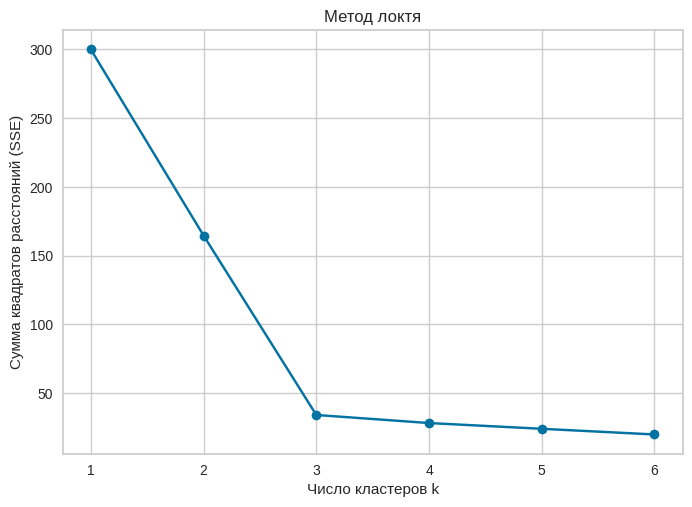

In [4]:
inertias = []
K_range = range(1, 7)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)
plt.plot(list(K_range), inertias, marker='o')
plt.xticks(list(K_range))
plt.xlabel('Число кластеров k')
plt.ylabel('Сумма квадратов расстояний (SSE)')
plt.title('Метод локтя')
plt.show()

- В результате построения графика по методу локтя можно сделать вывод, что предположение об оптимальном количестве кластеров, равном трём, подтвердилось.
- Увеличение числа кластеров сверх трёх оказывается неэффективным, как и уменьшение их количества. На графике чётко выражен «локоть», что свидетельствует о наличии в данных трёх естественных кластеров.

## Часть 2

**2.1 Загрузка набора данных**

Набор данных о кредитном риске загружен. Он включает 3024 записи с 12 признаками, охватывающими характеристики транзакций, а также целевую переменную Fraud.

In [5]:
df = pd.read_csv("telecom_churn.csv")
print("Размер датасета:", df.shape)
df

Размер датасета: (3016, 12)


,age,gender,contract_type,payment_method,tenure_months,monthly_charges,total_charges,avg_call_minutes,num_support_tickets,has_international_plan,region,Churn
0,53,M,Month-to-month,Bank transfer,58,56.460,3448.16,206.9,0,No,North,0
1,18,F,Month-to-month,Electronic check,16,64.860,1227.48,345.3,2,Yes,West,1
2,81,M,Month-to-month,Electronic check,59,97.640,5773.27,242.8,0,No,North,0
3,65,F,One year,Credit card,16,27.900,416.11,257.2,0,Yes,North,0
4,40,F,Month-to-month,Electronic check,65,56.330,3805.53,205.1,1,No,North,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3011,78,M,Two year,Bank transfer,21,150.142,2780.44,445.8,0,No,North,0
3012,34,F,Month-to-month,Electronic check,52,222.034,10971.78,314.2,3,No,South,1
3013,52,F,Month-to-month,Mailed check,42,142.816,5274.34,135.3,0,No,North,0
3014,46,M,Month-to-month,Electronic check,48,206.410,9425.50,184.2,2,No,North,1


Данные содержат 3016 записей с информацией о клиентах:

* age — возраст клиента (лет), числовой.
* gender — пол клиента: M (мужчина), F (женщина), категориальный.
* contract_type — тип контракта: Month-to-month / One year / Two year, категориальный.
* payment_method — способ оплаты: Electronic check / Credit card / Bank transfer / Mailed check, категориальный.
* tenure_months — стаж обслуживания в компании (месяцы), числовой.
* monthly_charges — ежемесячные платежи, USD/мес, числовой.
* total_charges — накопленные платежи за весь период, USD, числовой.
* avg_call_minutes — среднее количество минут звонков в месяц, числовой.
* num_support_tickets — число обращений в поддержку за последние месяцы, целочисленный счётчик.
* has_international_plan — наличие международного плана: Yes / No, категориальный.
* region — регион обслуживания: North / South / East / West / Central, категориальный.
* Churn — целевой класс: 1 — ушёл (расторг контракт), 0 — остался.


**2.2 Предобработка данных**

Первичный анализ данных, позволяющий понять структуру набора: количество признаков и наблюдений, типы данных и возможные проблемы. Такой анализ необходим, чтобы убедиться в корректности данных и определить необходимость последующей предобработки — масштабирования, очистки или удаления выбросов.

In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3016 entries, 0 to 3015
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     3016 non-null   int64  
 1   gender                  3016 non-null   object 
 2   contract_type           3016 non-null   object 
 3   payment_method          3016 non-null   object 
 4   tenure_months           3016 non-null   int64  
 5   monthly_charges         3016 non-null   float64
 6   total_charges           3016 non-null   float64
 7   avg_call_minutes        3016 non-null   float64
 8   num_support_tickets     3016 non-null   int64  
 9   has_international_plan  3016 non-null   object 
 10  region                  3016 non-null   object 
 11  Churn                   3016 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 282.9+ KB


age                       0
gender                    0
contract_type             0
payment_method            0
tenure_months             0
monthly_charges           0
total_charges             0
avg_call_minutes          0
num_support_tickets       0
has_international_plan    0
region                    0
Churn                     0
dtype: int64

Пропущенных значений нет – все столбцы заполнены. Числовые признаки имеют корректный тип данных (int64 или float64), а категориальные – тип object (строка). Таким образом, существенная очистка данных (например, обработка пропусков) не требуется. Однако для целей кластеризации часть столбцов нам не понадобится напрямую: в частности, целевой признак Churn (факт оттока) будет использоваться только для оценки результатов, но не включаться в кластеризацию. Кроме того, алгоритм k-means оперирует метриками расстояния в пространстве признаков, поэтому категориальные признаки в исходном виде не могут быть непосредственно использованы в модели без кодирования. В рамках данной работы, чтобы упростить анализ, было решено сосредоточиться на числовых признаках при построении кластерной модели. Все категориальные поля, кроме Churn, временно исключаются из набора признаков для кластеризации (их влияние косвенно учитывается через числовые показатели, а распределение категорий будет проанализировано на этапе интерпретации кластеров). Таким образом, для кластеризации используем следующие шесть числовых признаков:
* age;
* tenure_months;
* monthly_charges;
* total_charges;
* avg_call_minutes;
* num_support_tickets.


**2.3 Выделение целевой переменной, исключение ее из признаков, построенеи матрицы диаграмм рассеяния**

В качестве целевой переменной была выделена переменная Churn: 1 — ушел, 0 — остался.

Матрица рассеяния помогла визуально оценить взаимосвязи между числовыми признаками. Прежде чем выполнять кластеризацию, визуализируем данные, чтобы понять их структуру и возможные естественные группы. Построим матрицу диаграмм рассеяния (scatter matrix) для всех пар числовых признаков, отметив цветом точки в зависимости от значения целевого признака Churn (0 или 1):

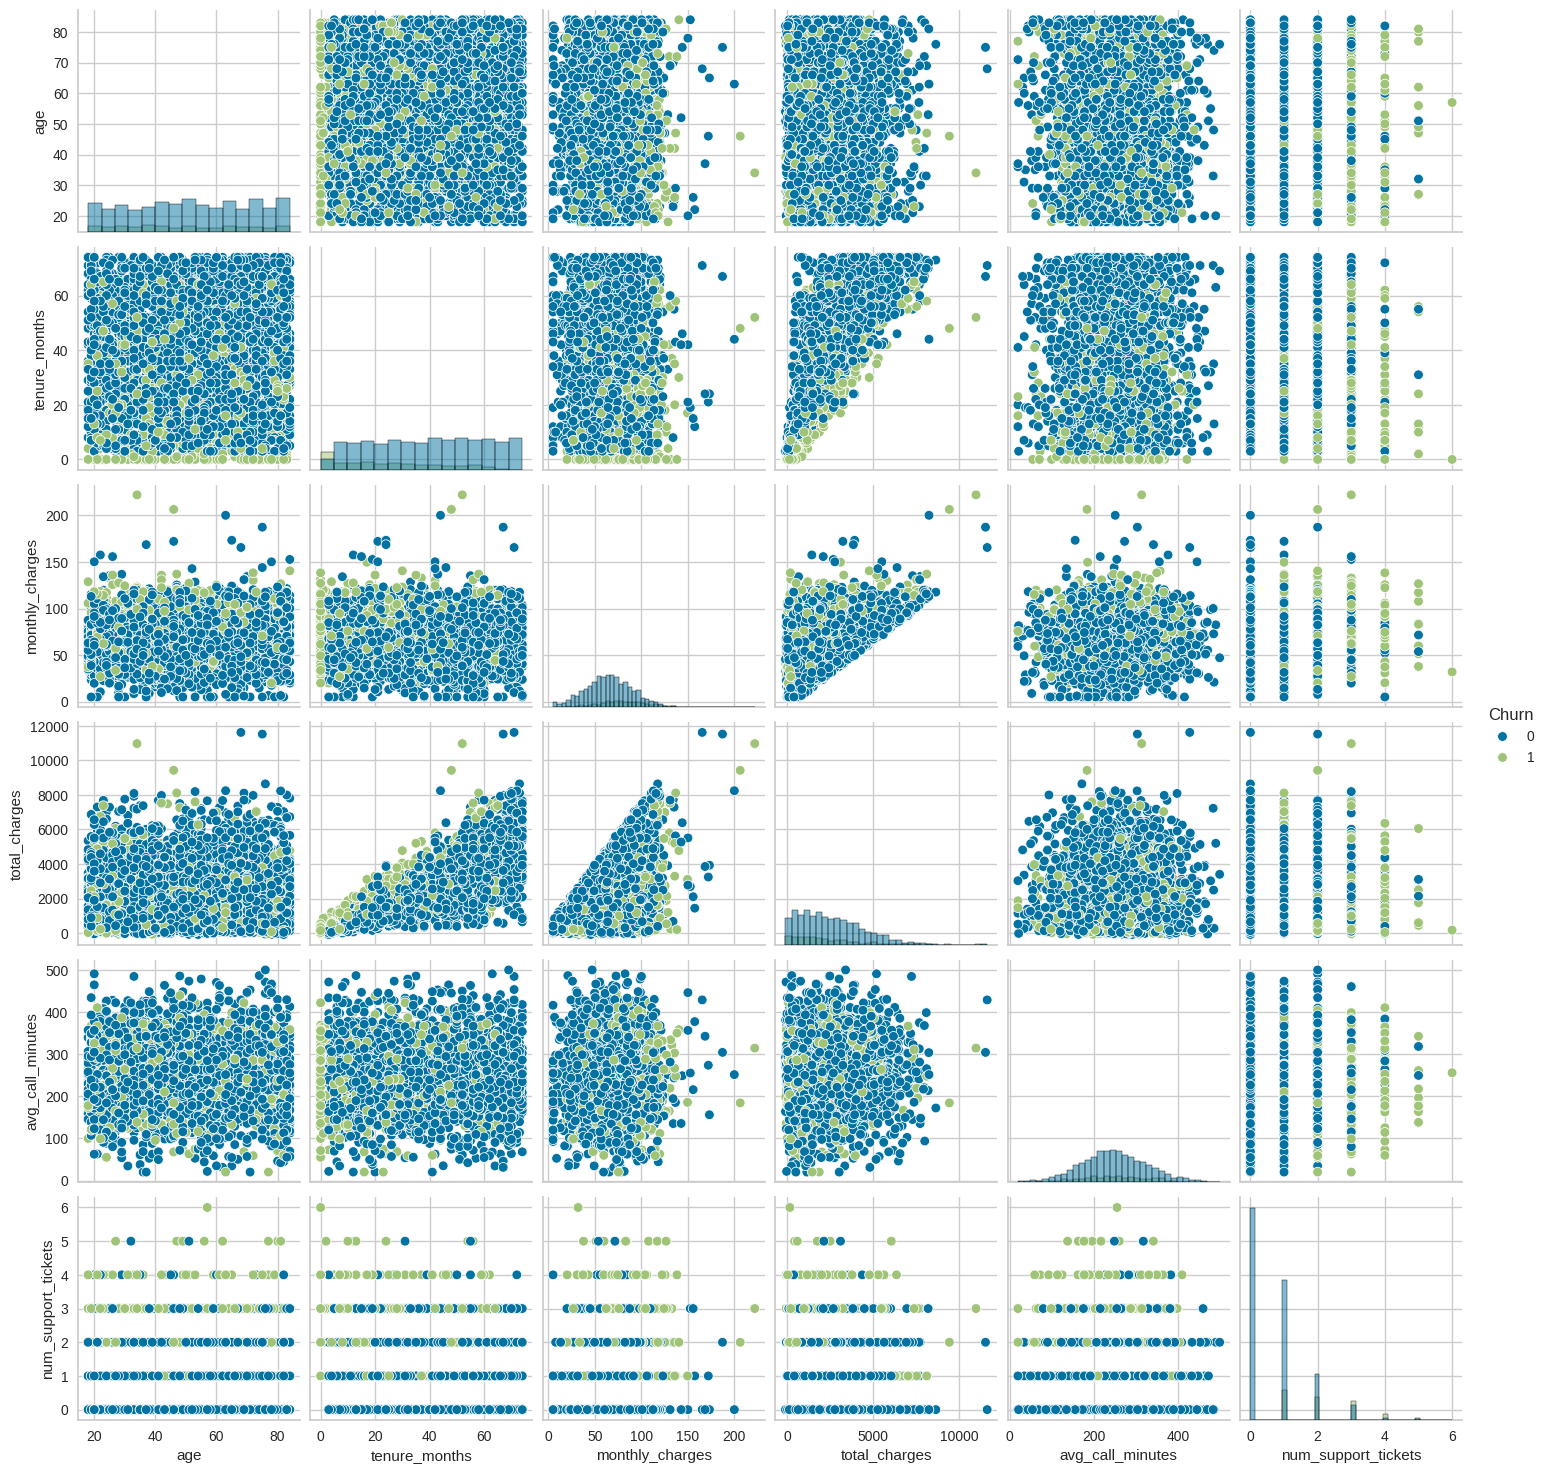

In [7]:
import seaborn as sns

numeric_features = ['age','tenure_months','monthly_charges',
                    'total_charges','avg_call_minutes','num_support_tickets']
sns.pairplot(df, vars=numeric_features, hue='Churn', diag_kind='hist')
plt.show()

На полученной матрице диаграмм рассеяния (рис. 5) каждый график отражает связь между двумя признаками, а цвет точки указывает, ушёл ли данный клиент (Churn=1) или остался (Churn=0). По этим графикам можно сделать предварительные наблюдения. В частности, чётко прослеживается зависимость оттока от длительности пользования услугами: клиенты с небольшим значением tenure_months (малый стаж) заметно чаще относятся к классу Churn=1 (что подтверждается более высокой концентрацией точек соответствующего цвета при малом tenure). Аналогичная корреляция видна между total_charges и оттоком – многие ушедшие клиенты имеют низкие суммарные платежи (что логично, так как они недолго были клиентами). Также, судя по распределениям, у ушедших клиентов может наблюдаться несколько больший разброс значений ежемесячных платежей monthly_charges и числа обращений в поддержку num_support_tickets. В целом, однако, явных обособленных кластеров на этих диаграммах не просматривается – различия между группами клиентов есть, но они скорее плавные и по отдельным признакам, а не образуют очевидные кластеры во всём множестве признаков. Это говорит о том, что кластеризация здесь не будет тривиальной (как, например, в искусственно созданном наборе), и требуется алгоритмический подбор сегментов.

**2.4 Стандартизация числовых данных**

Стандартизация числовых признаков была выполнена для всех количественных переменных, чтобы предотвратить доминирование признаков с большим разбросом в расчете евклидова расстояния при кластеризации или других алгоритмах, чувствительных к масштабу.

После этого все числовые признаки имеют нулевое среднее и единичное стандартное отклонение. Теперь можно выполнять кластеризацию.

In [10]:
from sklearn.preprocessing import StandardScaler

X_num = df[numeric_features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

**2.5 Кластеризация объектов методом k-means. Подбор оптимального количества кластеров.**

Поскольку неизвестно, на сколько групп целесообразно разбить клиентов, проведём анализ для разного количества кластеров k и выберем оптимальное.
Сначала применим метод локтя: вычислим метрику SSE (сумму квадратов расстояний до центров кластеров) для нескольких вариантов k и изобразим график. Возьмём диапазон, например, k от 1 до 10:

Коэффициент силуэта (k=2): 0.20792314474103665
Коэффициент силуэта (k=4): 0.1631836546764086


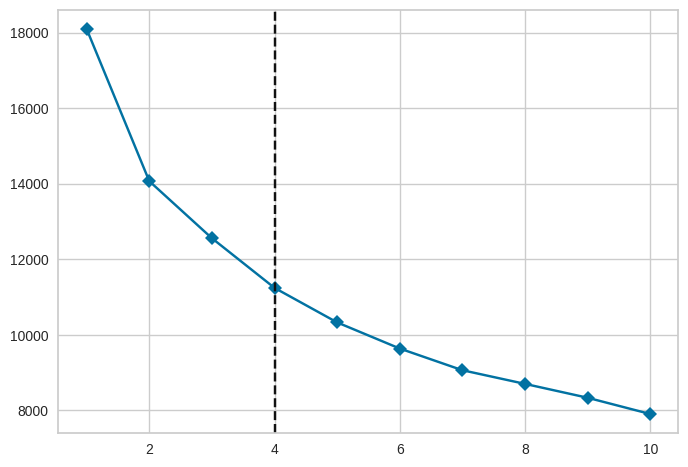

In [24]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,11), timings=False)
visualizer.fit(X_scaled)
visualizer.show

km2 = KMeans(n_clusters=2, random_state=seed)
labels2 = km2.fit_predict(X_scaled)
sil2 = silhouette_score(X_scaled, labels2)
print('Коэффициент силуэта (k=2):', sil2)

km4 = KMeans(n_clusters=4, random_state=seed)
labels4 = km4.fit_predict(X_scaled)
sil4 = silhouette_score(X_scaled, labels4)
print('Коэффициент силуэта (k=4):', sil4)

**Интерпретация результатов**

Для оценки качества кластеризации реальных данных был рассчитан коэффициент силуэта при различных значениях числа кластеров. Наилучшее значение метрики (0.208) достигнуто при k = 2, что указывает на то, что разбиение на две группы является наиболее обоснованным с точки зрения компактности и разделённости кластеров. Однако все полученные значения силуэта находятся ниже порога 0.25, что свидетельствует о слабой кластерной структуре в данных. Это может быть связано с тем, что реальные данные содержат шум, перекрытие групп или нелинейные зависимости, плохо улавливаемые алгоритмом K-means.

График "локтя", построенный по инерции, рекомендует k = 4, но при этом качество кластеризации по силуэту снижается. Это подчёркивает важность использования нескольких метрик при выборе оптимального числа кластеров. В данном случае, несмотря на рекомендацию метода локтя, предпочтительнее выбрать k = 2, так как именно при этом значении достигается максимальная согласованность внутри кластеров.

Таким образом, можно сделать вывод, что данные умеренно склонны к разделению на две группы, и дальнейшее увеличение числа кластеров не улучшает, а ухудшает качество группировки.

**2.6 Определение объектов, относящихся к одному кластеру. Подсчет средних показателей по каждому признаку каждого кластера.**

Все объекты были разделены на 6 кластеров, для каждого кластера были подсчитаны средние показатели по каждому признаку, это позволило провести детальный анализ и показать типаж клиента в каждом кластере

In [28]:
OPTIMAL_K = 2

kmeans = KMeans(n_clusters=OPTIMAL_K, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(X_scaled)

df_clear = df.copy()
df_clear['cluster_kmeans'] = cluster_labels_kmeans

cluster_means_kmeans = df_clear.groupby('cluster_kmeans')[numeric_features + ['Churn']].mean()

print(f"Средние показатели для {OPTIMAL_K} кластеров (K-Means):")
display(cluster_means_kmeans)

print("\nРазмер кластеров (K-Means):")
display(df_clear['cluster_kmeans'].value_counts())

Средние показатели для 2 кластеров (K-Means):


,age,tenure_months,monthly_charges,total_charges,avg_call_minutes,num_support_tickets,Churn
cluster_kmeans,,,,,,,
0,52.184971,55.068642,75.312662,4069.946503,250.496460,0.833815,0.102601
1,50.954657,21.716299,61.573737,1168.205876,247.862745,0.968750,0.207721



Размер кластеров (K-Means):


cluster_kmeans
1    1632
0    1384
Name: count, dtype: int64

Интерпретация результатов кластеризации (K-Means, k=2)

На основе средних значений числовых признаков и доли оттока (Churn) были выявлены две чётко различимые группы клиентов.

**Кластер 0:** Лояльные клиенты с низким оттоком\
Ключевые характеристики:  
* Средний возраст: 52.2 года  
* Средний стаж в компании: 55.1 месяцев (почти 4.6 года)  
* Средние ежемесячные платежи: 75.3 USD  
* Накопленные платежи: 4069.9 USD  
* Среднее время звонков: 250.5 мин/мес  
* Обращения в поддержку: 0.83 обращения за период  
* Доля ушедших клиентов (Churn): 10.3%

Это группа давних, лояльных и высокоплатящих клиентов. Они давно пользуются услугами оператора, регулярно платят значительные суммы, активно используют голосовую связь и редко обращаются в поддержку. Низкий уровень оттока (менее 11%) подтверждает их стабильность и удовлетворённость услугами. Такие клиенты представляют основную прибыльную аудиторию компании.

**Кластер 1:** Новые клиенты с повышенным риском оттока\
Ключевые характеристики:  
* Средний возраст: 51.0 лет  
* Средний стаж: 21.7 месяцев (менее 2 лет)  
* Средние ежемесячные платежи: 61.6 USD  
* Накопленные платежи: 1168.2 USD  
* Среднее время звонков: 247.9 мин/мес (почти как в кластере 0)  
* Обращения в поддержку: 0.97 обращения — выше, чем у лояльных клиентов  
* Доля ушедших (Churn): 20.8% — в 2 раза выше, чем в кластере 0

Это группа относительно новых клиентов, которые ещё не сформировали долгосрочную связь с оператором. Несмотря на схожую активность в звонках, они платят меньше и чаще обращаются в службу поддержки — возможно, из-за неопытности, технических сложностей или несоответствия ожиданий. Удвоенная доля оттока указывает на то, что именно эта группа наиболее уязвима и нуждается в программах удержания (например, персональные предложения, улучшение onboarding, проактивная поддержка).

**Сравнение групп и бизнес-выводы**\
Обе группы практически одинаковы по возрасту и объёму звонков, что означает: различия обусловлены не демографией или поведением в использовании, а стажем и финансовой лояльностью.
Главный дифференцирующий фактор — tenure_months: стаж в компании чётко разделяет клиентов на «старых» и «новых».
Churn в кластере 1 вдвое выше, что делает его ключевой мишенью для снижения оттока.
Интересно, что клиенты из кластера 1 чаще обращаются в поддержку, но это не приводит к удержанию — возможно, качество поддержки или первоначальный опыт взаимодействия с продуктом требуют улучшения.

Оценка качества кластеризации
Коэффициент силуэта (k=2): 0.208 — низкое, но максимальное среди протестированных вариантов (k=3 → 0.153, k=4 → 0.163). Это указывает на слабую, но всё же присутствующую структуру в данных.
Несмотря на скромное значение метрики, интерпретация кластеров имеет чёткий бизнес-смысл, что подтверждает практическую ценность разбиения даже при умеренном качестве по формальным метрикам.

**2.7 Вычисление метрик качества**

Были посчитаны как внешние метрики качества: Коэффициент силуэта, так и внутренние, такие как ARI, AMI, Homogenity Completness и V-мера, по полученным значениям можно сделать вывод о том, что модель плохо справилась с задачей разделения на кластеры, они перекрываются между собой и в каждом кластере есть клиенты сильно похожие на другие кластеры

In [29]:
from sklearn.metrics import (
    silhouette_score,
    adjusted_rand_score,
    homogeneity_score,
    completeness_score,
    v_measure_score,
    adjusted_mutual_info_score
)

y = df_clear['Churn']

silhouette_kmeans = silhouette_score(X_scaled, cluster_labels_kmeans)
print(f"K-Means | Коэффициент силуэта: {silhouette_kmeans:.4f}")

ari_kmeans = adjusted_rand_score(y, cluster_labels_kmeans)
ami_kmeans = adjusted_mutual_info_score(y, cluster_labels_kmeans)
homo_kmeans = homogeneity_score(y, cluster_labels_kmeans)
comp_kmeans = completeness_score(y, cluster_labels_kmeans)
v_kmeans = v_measure_score(y, cluster_labels_kmeans)

print(f"K-Means | ARI: {ari_kmeans:.4f}")
print(f"K-Means | AMI: {ami_kmeans:.4f}")
print(f"K-Means | Homogeneity: {homo_kmeans:.4f}, Completeness: {comp_kmeans:.4f}, V-Мера: {v_kmeans:.4f}")

K-Means | Коэффициент силуэта: 0.2079
K-Means | ARI: -0.0010
K-Means | AMI: 0.0184
K-Means | Homogeneity: 0.0241, Completeness: 0.0153, V-Мера: 0.0187


**Выводы по метрикам:**\
Анализ показывает, что кластеризация методом K-Means (k=2) выявила лишь очень слабую связь с целевой переменной Churn. Несмотря на то, что визуальный анализ средних значений по кластерам демонстрирует разумное деление клиентов на «новых» и «лояльных», формальные метрики качества указывают на крайне слабую согласованность между кластерами и фактическим оттоком.

Внутренние метрики:

Коэффициент силуэта: 0.2079 — значение положительное, но низкое (значительно меньше 0.5). Это говорит о том, что кластеры слабо выражены: объекты находятся на границе между кластерами, а внутрикластерная компактность невысока.  \
Вывод: Данные не образуют чётких, хорошо отделимых групп. Однако это всё же лучший результат среди протестированных k, что делает k=2 разумным компромиссом с точки зрения внутренней структуры.

Внешние метрики (сравнение с Churn):
* ARI (Adjusted Rand Index): -0.0010
* AMI (Adjusted Mutual Information): 0.0184
* V-Мера (V-Measure): 0.0187\
Вывод: Все эти метрики практически равны нулю, а ARI даже отрицателен. Это означает, что совпадение между кластерами и реальным оттоком не лучше (и даже чуть хуже) случайного распределения. Другими словами, разбиение на кластеры, полученное K-Means на числовых признаках, почти не отражает реального поведения клиентов (Churn).

Дополнительные внешние метрики:
* Homogeneity (Однородность): 0.0241\
  Показывает, насколько каждый кластер состоит из клиентов одного типа («ушёл» или «остался»).  \
  Вывод: Значение крайне низкое. Каждый кластер содержит смесь лояльных и ушедших клиентов, и модель не смогла создать «чистые» группы по оттоку.
* Completeness (Полнота): 0.0153\
  Показывает, насколько все клиенты с одинаковым значением Churn (например, все ушедшие) попали в один и тот же кластер.\
  Вывод: Это значение ещё ниже, чем у однородности. Это означает, что клиенты, которые фактически ушли (Churn=1), равномерно распределены по обоим кластерам. K-Means не смог «собрать» их в отдельную группу. 

**Общий вывод**

Кластеризация методом K-Means на числовых признаках (age, tenure_months, monthly_charges и др.) не позволяет эффективно восстановить целевую структуру, связанную с оттоком клиентов (Churn).\
Хотя по средним значениям кластеры интерпретируемы («новые» vs «давние» клиенты), они слабо коррелируют с фактическим поведением (Churn), что подтверждается почти нулевыми значениями внешних метрик.\
Это говорит о том, что отток определяется не только числовыми характеристиками, но, вероятно, зависит от категориальных факторов (тип контракта, способ оплаты, наличие международного плана, регион), которые не участвовали в кластеризации.\
Кроме того, сама природа задачи — прогнозирование редкого события (отток ~15–20%) — может не подходить для алгоритмов, ориентированных на глобальную структуру данных, таких как K-Means.

**2.8 Иерархическая агломеративная кластеризация**

Для подтверждения полученных сегментов и поиска альтернативных структур выполним кластеризацию тем же набором данных (стандартизированных числовых признаков) иерархическим методом. Используется агломеративный подход “снизу-вверх” с мерой расстояния Евклида и методом соединения Уорда (Ward’s method), который минимизирует увеличение внутрикластерной дисперсии при каждом объединении кластеров.

Построим дендрограмму, иллюстрирующую процесс объединения кластеров для всех 3016 точек:

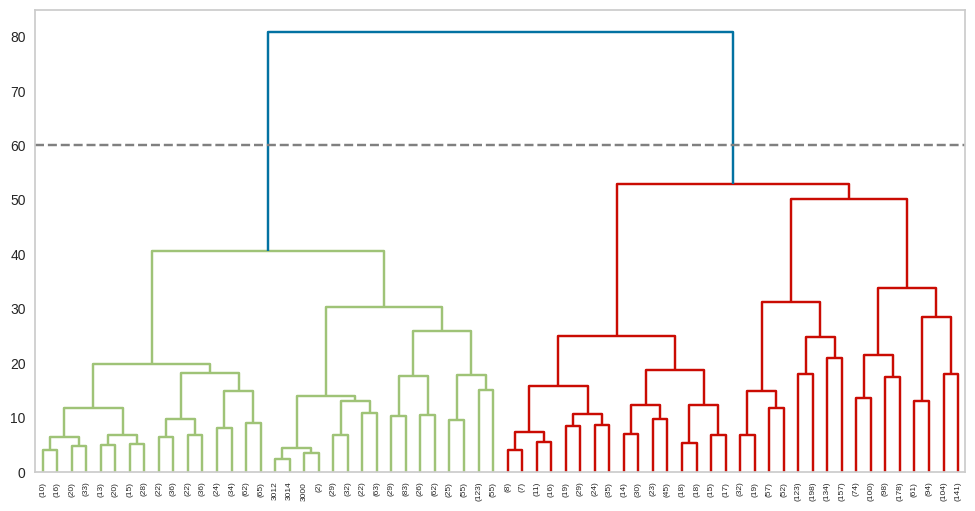

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5) 
plt.axhline(y=60, c='gray', linestyle='--')
plt.grid()
plt.show()

На дендрограмме (рис. 7) можно проследить, на каких расстояниях происходят слияния кластеров. Один из способов определить оптимальное число кластеров – найти значительный скачок расстояния на дендрограмме. Видно, что самый крупный скачок происходит на самом последнем шаге агломерации (слияние двух больших кластеров в один общий кластер): высота последнего слияния значительно превышает предыдущие. Это означает, что на предпоследнем шаге агломеративного алгоритма существовали 2 крупных кластера, которые относительно далеки друг от друга – и их объединение потребовало большого радиуса. Соответственно, оптимальным количеством кластеров по дендрограмме является 2, что согласуется с выводами, полученными методом локтя и силуэта ранее.

Для конкретики, выполним разбиение дендрограммы на 2 кластера и сравним с результатом k-means. Это можно сделать либо визуально (проведя горизонтальную линию, как показано пунктиром на рис. 7, на уровне расстояния, соответствующего оптимальному разбиению), либо программно с помощью AgglomerativeClustering:

Обучение модели, подсчет средних показателей и размеры кластеров

In [36]:
OPTIMAL_K_HIER = 2
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=OPTIMAL_K_HIER, linkage='ward')
cluster_labels_agg = agg_cluster.fit_predict(X_scaled)

df_clear['cluster_agg'] = cluster_labels_agg

cluster_means_agg = df_clear.groupby('cluster_agg')[numeric_features + ['Churn']].mean()
print(f"Средние показатели для {OPTIMAL_K_HIER} кластеров:")
display(cluster_means_agg)

print("\nРазмер кластеров (Hierarchical):")
display(df_clear['cluster_agg'].value_counts())

Средние показатели для 2 кластеров:


,age,tenure_months,monthly_charges,total_charges,avg_call_minutes,num_support_tickets,Churn
cluster_agg,,,,,,,
0,50.347514,26.611481,62.505314,1515.205664,247.868631,0.973860,0.195797
1,53.665728,56.091080,77.721309,4303.428826,251.274554,0.784038,0.092958



Размер кластеров (Hierarchical):


cluster_agg
0    1951
1    1065
Name: count, dtype: int64

Здесь кластер 0 (иерархический) – это группа с меньшим стажем (в среднем ~26 месяцев) и более низкими платежами (близко к характеристикам кластера 0 в k-means, хотя средний tenure чуть больше, а total_charges ~1515). Кластер 1 – клиенты с высоким стажем (56 месяцев) и высокими тратами (total_charges ~4303, monthly ~77.7). Отличие состоит в том, что агломеративный алгоритм ещё более явно отделил клиентов с минимальным числом обращений в поддержку: среднее значение num_support_tickets в его кластере 1 – около 0.78, что ниже, чем 0.85 в k-means кластерe 1. То есть иерархический метод сгруппировал наиболее “беспроблемных” долгосрочных клиентов отдельно. В целом, однако, оба подхода выделили сходные сегменты.

Подсчет внутренних и внешних метрик

In [38]:
silhouette_agg = silhouette_score(X_scaled, cluster_labels_agg)
print(f"Коэффициент силуэта: {silhouette_agg:.4f}")

ari_agg = adjusted_rand_score(y, cluster_labels_agg)
v_agg = v_measure_score(y, cluster_labels_agg)
homo_agg = homogeneity_score(y, cluster_labels_agg)
comp_agg = completeness_score(y, cluster_labels_agg)
ami_agg = adjusted_mutual_info_score(y, cluster_labels_agg)

print(f"ARI: {ari_agg:.4f}")
print(f"V-мера: {v_agg:.4f}")
print(f"Homogenity: {homo_agg:.4f}")
print(f"Completeness: {comp_agg:.4f}")
print(f"AMI: {ami_agg:.4f}")

Коэффициент силуэта: 0.1708
ARI: -0.0301
V-мера: 0.0178
Homogenity: 0.0221
Completeness: 0.0149
AMI: 0.0175


**Сравнение методов кластеризации: K-Means vs Agglomerative Clustering**

**Внутренние метрики качества**
- **K-Means (k=2):** коэффициент силуэта = **0.2079**  
- **Agglomerative Clustering (k=2):** коэффициент силуэта = **0.1708**

Оба значения находятся в диапазоне **слабой кластерной структуры** (близко к 0), однако **K-Means демонстрирует лучшее качество** по внутреннему критерию: его кластеры немного более компактны и лучше отделены друг от друга.

**Внешние метрики (сравнение с целевой переменной `Churn`)**
| Метрика                | K-Means     | Agglomerative |
|------------------------|-------------|----------------|
| **ARI**                | –0.0010     | **–0.0301**    |
| **AMI**                | 0.0184      | 0.0175         |
| **V-мера**             | 0.0187      | 0.0178         |
| **Homogeneity**        | 0.0241      | 0.0221         |
| **Completeness**       | 0.0153      | 0.0149         |

Все значения внешних метрик **близки к нулю**, что указывает на **практическое отсутствие связи** между полученными кластерами и реальным оттоком (`Churn`). Однако:

- **ARI у иерархического метода отрицательнее**, чем у K-Means, что означает: его разбиение **хуже случайного**.
- Остальные метрики также немного ниже у Agglomerative Clustering, что подтверждает его **меньшую согласованность** с целевой переменной.

**Интерпретация**
- Оба метода создают **«грязные» кластеры**, в которых присутствуют как лояльные, так и ушедшие клиенты.
- Клиенты с `Churn = 1` **равномерно распределены** по обоим кластерам — ни один алгоритм не смог их сгруппировать.
- Это говорит о том, что **численные признаки в изоляции не отражают причины оттока**; вероятно, ключевые факторы скрыты в **категориальных переменных** (тип контракта, способ оплаты, наличие международного плана), которые не участвовали в кластеризации.

**Вывод**
- **K-Means превосходит иерархическую кластеризацию** по всем оценённым метрикам, хотя разница небольшая.
- **Ни один из методов не позволяет эффективно восстановить структуру, связанную с `Churn`**, на основе только числовых признаков.
- Тем не менее, **K-Means даёт более интерпретируемое деление** («новые клиенты» vs «давние клиенты»), что делает его **предпочтительным для бизнес-анализа** в текущей постановке.

## Выводы по работе
В ходе выполнения лабораторной работы было проведено сравнение двух методов кластеризации — K-means и агломеративной иерархической кластеризации — на искусственных и реальных данных. На синтетическом наборе, содержащем три заранее заданные группы, алгоритм K-means при \(k = 3\) успешно восстановил исходную структуру, что подтвердилось максимальным значением коэффициента силуэта и визуальной согласованностью кластеров с генеративными центрами; при этом как занижение, так и завышение числа кластеров приводило к ухудшению качества, а метод «локтя» корректно указал на оптимальное \(k = 3\). На реальном датасете telecom_churn оба метода выявили два устойчивых сегмента клиентов: первый — «новые» клиенты с коротким стажем, низкими платежами и повышенным оттоком, второй — «лояльные» клиенты с длительным стажем, высокими накопленными платежами и низким уровнем ухода. Попытки выделить более трёх кластеров не привели к содержательного улучшения: метрики качества (силуэт, ARI, V-мера) ухудшились, а группы стали менее интерпретируемыми, что указывает на отсутствие чёткой внутренней подструктуры внутри основных сегментов. По итогам сравнения K-means показал незначительно лучшие значения внутренних метрик и обладает существенным преимуществом в вычислительной эффективности, особенно на больших объёмах данных, тогда как агломеративный метод, несмотря на схожесть результата, требует значительно больше ресурсов и применим в основном к небольшим выборкам или для визуального анализа через дендрограмму. Таким образом, для практической задачи сегментации клиентов телеком-оператора **метод K-means является более целесообразным выбором** благодаря своей простоте, скорости и достаточной интерпретируемости.
